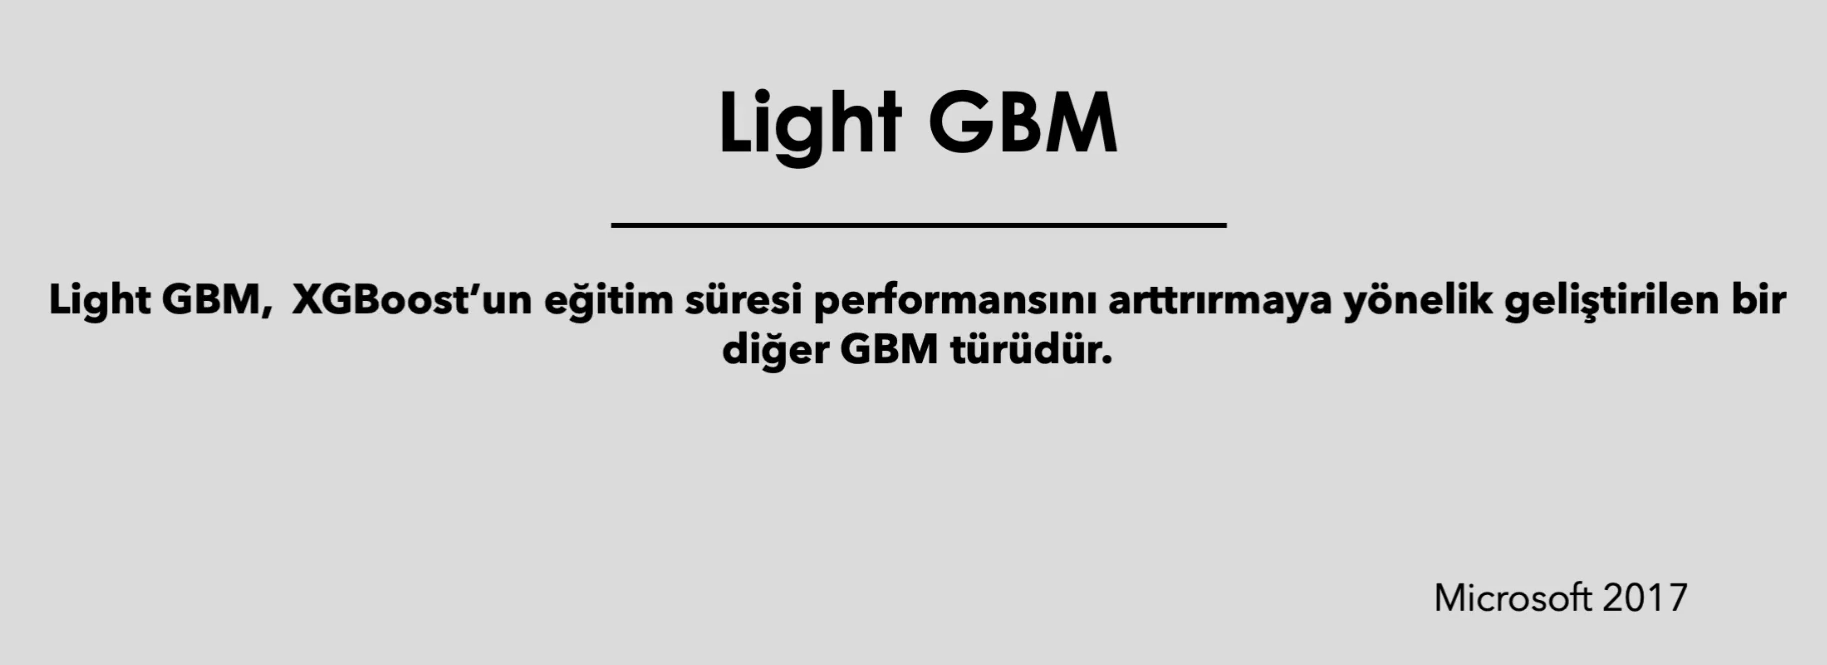

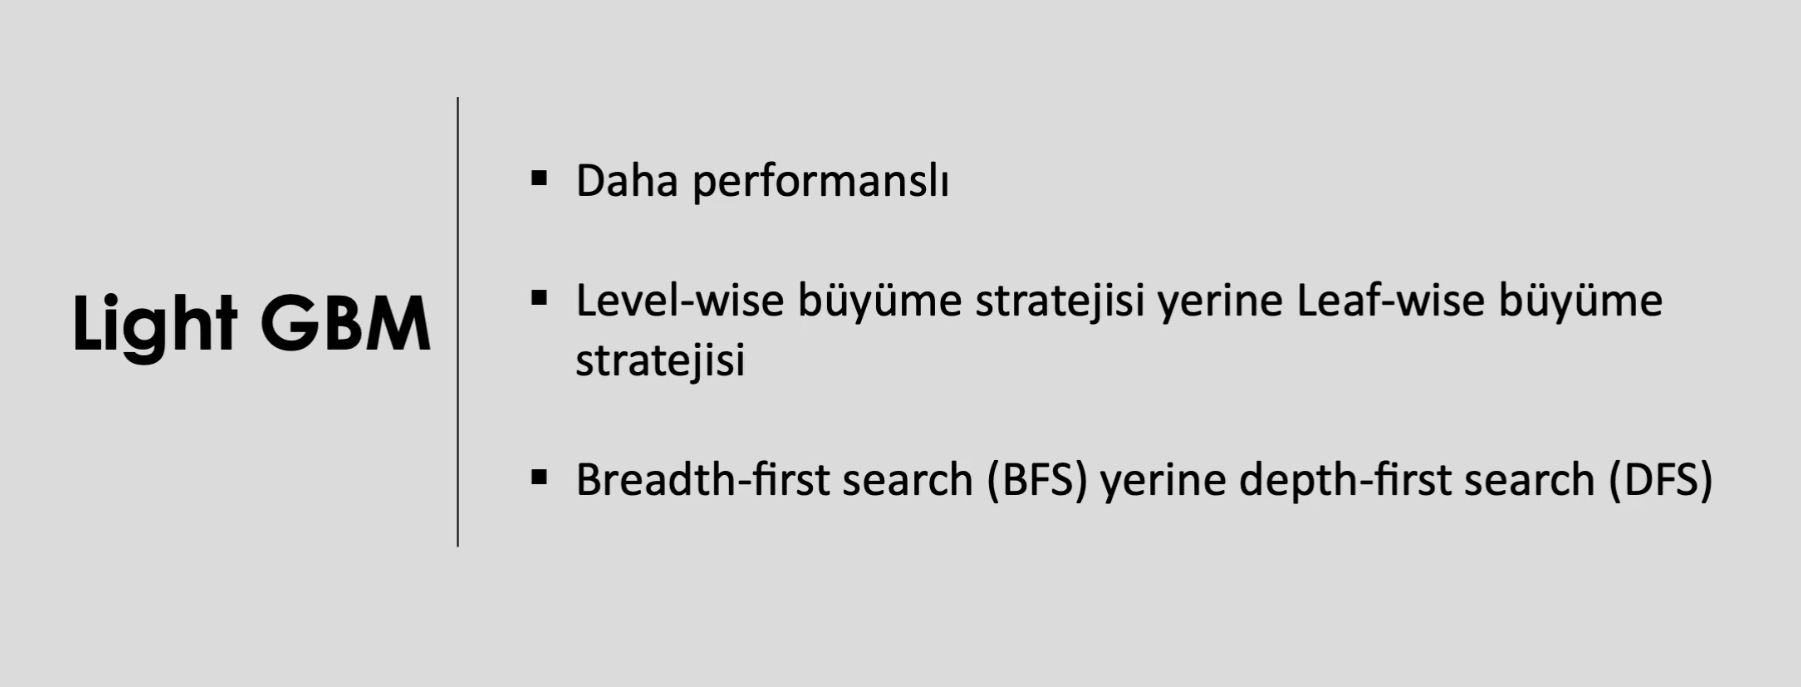

## Light GBM Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [3]:
#!pip install lightgbm

In [5]:
from lightgbm import LGBMRegressor

In [6]:
lgbm=LGBMRegressor()
lgbm_model = lgbm.fit(X_Train,Y_Train)

### Tahmin

In [9]:
y_pred = lgbm_model.predict(X_Test, num_iteration=lgbm_model.best_iteration_)

In [10]:
np.sqrt(mean_squared_error(Y_Test, y_pred))

363.8712087611089

## Model Tuning

In [11]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [13]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5, 0,6, 0.9, 1],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [20,40,100,200,500,1000],
    'max_depth': [1,2,3,4,5,6,7,8]
}
lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs=-1, verbose=2)

lgbm_cv_model.fit(X_Train, Y_Train)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0, 6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [14]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [29]:
lgbm_tuned = LGBMRegressor(  colsample_bytree=0.5,
                             learning_rate = 0.1,
                             max_depth= 7,
                             n_estimators = 20)

lgbm_tuned = lgbm_tuned.fit(X_Train, Y_Train)

In [30]:
y_pred = lgbm_tuned.predict(X_Test)
np.sqrt(mean_squared_error(Y_Test, y_pred))

375.6085209015434